In [5]:
import numpy as np
X1 = [0,0,1,1]
X2 = [0,1,0,1]
W1 = 1
W2 = 1
T = 0.8
def McCullochPitts(X):
    andgate = []
    for i in range(len(X)):
        X = X1[i]*W1 + X2[i]*W2
        activation = 1/(1+np.exp(-X))
        if activation > T:
            andgate.append(1)
        else:
            andgate.append(0)

    notgate = []
    for i in range(len(andgate)):
        if andgate[i] == 1:
            notgate.append(0)
        else:
            notgate.append(1)

    return notgate

    
        

In [6]:
McCullochPitts(X)

[1, 1, 1, 0]

In [22]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([[0],[1],[1],[0]])

np.random.seed(42)
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1

weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)

bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    #  .......Forward propogation.......
    #Hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    #Final layer
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    #  .......backward propogation......
    #error calculation
    error = Y - final_output
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)
    

    #weights and bias updation
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis = 0, keepdims = True) *learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis = 0, keepdims = True) *learning_rate

    #loss calculation
    if epoch % 1000 ==0:
        loss = np.mean(np.square(error))
        print(f"Epoch:{epoch} Loss:{loss:.4f}")

print("\n The Final Output after training is :")
print(final_output.round(3))

    

Epoch:0 Loss:0.3855
Epoch:1000 Loss:0.2395
Epoch:2000 Loss:0.1898
Epoch:3000 Loss:0.1314
Epoch:4000 Loss:0.0460
Epoch:5000 Loss:0.0168
Epoch:6000 Loss:0.0088
Epoch:7000 Loss:0.0056
Epoch:8000 Loss:0.0040
Epoch:9000 Loss:0.0031

 The Final Output after training is :
[[0.05 ]
 [0.947]
 [0.957]
 [0.051]]


In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a simple dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3020 - loss: 1.1486
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3155 - loss: 1.1053
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3130 - loss: 1.0786
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3344 - loss: 1.0149
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3383 - loss: 0.9858
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3615 - loss: 0.9228
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3837 - loss: 0.9181
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4332 - loss: 0.8738
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4459 - loss: 0.8283
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4509 - loss: 0.8178
Test Accuracy: 0.44


C:\Users\admin\AppData\Local\Temp\ipykernel_7768\4131960852.py:37: RuntimeWarning: divide by zero encountered in divide
  y_vals = (-model.weights[0] * x_vals - model.bias)/ model.weights[1]


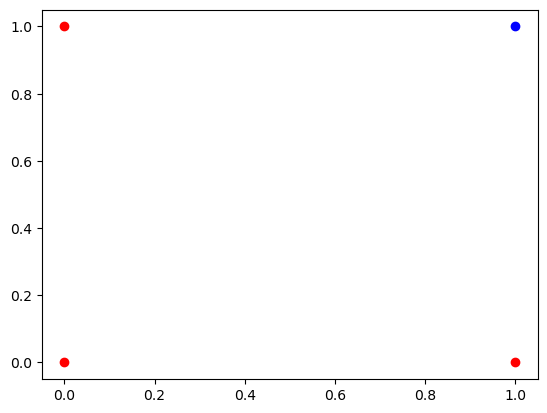

In [11]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([0,0,0,1])

class Perceptron():
    def __init__(self):
        self.weights = np.zeros(2)
        self.bias = 0.75

    def activation(self,x):
        return 1 if x>0 else 0

    def predict(self,x):
        return self.activation(np.dot(x,self.weights) + self.bias)

    def train(self,X,Y,lr=0.1,epoch=10):
        for _ in range(len(X)):
            for xi,target in zip(X,Y):
                
                pred = self.predict(xi)
                error = target - pred
                self.weights += lr * error * xi
                self.bias += lr * error
model = Perceptron()
model.train(X,Y)

for i in range(len(X)):
    color = 'red' if Y[i]==0 else 'blue'
    plt.scatter(X[i][0],X[i][1], color = color)

x_vals = np.array([X[:,0].min()-1,X[:,0].max()+1])
y_vals = (-model.weights[0] * x_vals - model.bias)/ model.weights[1]
plt.plot(x_vals,y_vals,'k--',label = 'decision boundary')

In [12]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]])
Y = np.array([[0],[0],[0],[1]])

class Perceptron():
    def __init__(self):
        